- author: Edoardo Bonetti
- date: 11/12/2024


# Generalized Circle
rectrate the following set:
\begin{equation*}
\left\lbrace (x,y) \vert x^N + y^N \leq 1\right\rbrace
\end{equation*}

Import thhe necessary modules

In [38]:
from ngsolve import *
from ngsolve.webgui import Draw

from netgen.occ import * # create cool domains

import numpy as np
import matplotlib.pyplot as plt


Create set of points to recreate the top-right part of the figure with numpy

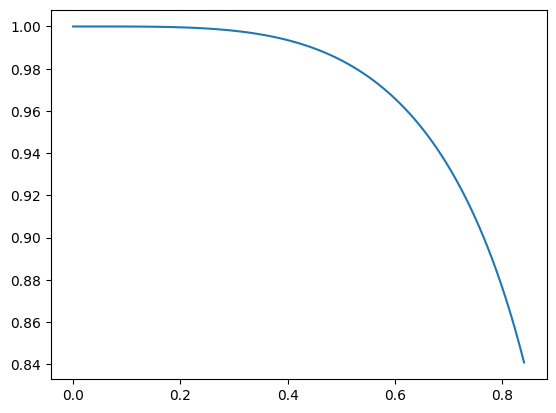

In [39]:
N = 4
xvals = np.linspace(0, (1/2)**(1/N), 100)


fun = lambda v : (1 - v**N)**(1/N)
yvals = fun(xvals)

plt.plot(xvals, yvals)

Approximate with an spline

In [40]:
pnts = [Pnt(xvals[i], yvals[i]) for i in range(len(xvals))]

for i in range(len(pnts)-1, -1, -1):
    p = pnts[i]
    pnts.append(Pnt(p.y, p.x))

spline = SplineApproximation(pnts)

#wire_tr = Wire([spline])
wire_tr= spline.Wire()
#Draw(wire_tr)


To create the final shape create the wire from the top right to the bottom right, take the union and mirror it on the left. Then extract the face

In [41]:


wire_tl = wire_tr.Mirror(Axis((0,0,0), Y))
wire_bl= wire_tl.Mirror(Axis((0,0,0), X))
wire_br = wire_tr.Mirror(Axis((0,0,0), X))
wires = wire_tr + wire_tl +wire_br+wire_bl

f = Face(Wire(wires.wires))

#Draw(f)


To create the mesh remember to specify the dimension, otherwise it generates a non-sensical mesh. Create the mesh and curve it at least as much as the $N$

In [42]:
mesh = Mesh(OCCGeometry(f, dim = 2).GenerateMesh(maxh = 0.05))
mesh.Curve(N)
#Draw(mesh)


In [43]:
# Solve a poisson problem just to see if it works
fes = H1(mesh, order=2, dirichlet=".*")
u, v = fes.TnT()

a = BilinearForm(fes)
a +=grad(u)*grad(v)*dx

f = LinearForm(fes)
f +=1*v * dx

a.Assemble()
f.Assemble()

gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec

Draw(gfu)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene